# <span style = 'color:purple'> Regresión lineal simple

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
#Librerias para la division de los conjuntos de entrenamiento
#1 Libreria para crear los modelos de regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #1

from matplotlib.legend import Legend
from matplotlib import ticker

plt.rc("text", usetex = True)
plt.rc("font", family = "serif")

# <span style = 'color: purple'> Procesamiento de los datos

In [2]:
data_set = pd.read_csv("Salary_Data.csv")
#data_set['Salary'] = data_set['Salary'].map('{:.0f}'.format)# POR QUÉ NO FUNCIONA CUANDO SE ACTIVA ESTA LÍNEA
data_set.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
x = data_set.iloc[:,:-1].values
y = data_set.iloc[:,1].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state =0)

In [5]:
def Table_Vector (v):
    "Función para visualizar vector como Dataframes"    
    v = pd.DataFrame(v)
    return v

In [6]:
def Table_comparison(v1, v2,column1, column2):
    "Función para comparar los datos de las pruebas y predicciones"
    comparison = pd.concat([Table_Vector(v1), Table_Vector(v2)], axis = 1)
    comparison = comparison.set_axis([column1, column2], axis=1)
    return comparison

# <span style = 'color: purple'> Modelo de regresión lineal
Se crea el modelo de regresión lineal con los datos de entrenamiento

In [7]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# <span style = 'color:purple'> Predecir el conjunto de pruebas
Se van a predecir las observaciones con base en el modelo de regresión

In [8]:
y_pred = regression.predict(x_test)
Table_comparison(y_test, y_pred, 'y_test', 'y_pred') 

,y_test,y_pred
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


# <span style = 'color: purple'> Visualización de los datos

Text(0, 0.5, 'Sueldo (dolares)')

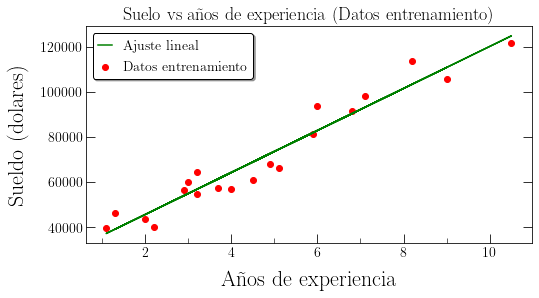

In [9]:
fs = 14
ps = 12

fig, ax = plt.subplots(1,1, sharex = False, sharey = False, figsize=(8,4))
ax.scatter(x_train, y_train, color ='red')
ax.plot(x_train, regression.predict(x_train), color = 'g')

#Ejes
ax.tick_params(axis='both', which='major', labelsize=14,length=9,direction='in')
ax.tick_params(axis='both', which='minor', labelsize=14,length=5,direction='in')
ax.yaxis.set_tick_params(right='on',which='both')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#LEGENDAS
ax.legend(
          ['Ajuste lineal', 'Datos entrenamiento'], loc = "best",
          frameon= True, handlelength = True, fontsize = fs,
          shadow = True,facecolor = "white", edgecolor = 'Black'
                ) 
#Título y etiquetas
ax.set_title(r'Suelo vs años de experiencia (Datos entrenamiento)', fontsize = 18)
ax.set_xlabel(r'Años de experiencia', fontsize=22, labelpad = 12)
ax.set_ylabel(r'Sueldo (dolares)', fontsize=22, labelpad = 12)

In [10]:
#plt.scatter(x_train, y_train)